In [1]:
import sys
sys.path.append('/home/george/graph-studies')
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from directed_graph import DirectedStochasticBlockModel
from clustering_algorithms.directed_clustering_zanetti import DSBM_Clustering_Zanetti
from clustering_algorithms.exponential_clustering import Exponential_Clustering, Exponential_Clustering_no_evecs

In [2]:
# Setting random seed for reproducibility
np.random.seed(10)

With F set to be $$F = \begin{pmatrix} 0.5 & 0.9 & 0.1 \\ 0.1 & 0.5 & 0.9 \\ 0.9 & 0.1 & 0.5 \end{pmatrix}$$ , we reduce p and q and plot heatmaps of the projected eigenvectors of A, the Laplacian, the projected eigenvectors of cos(-iA) and cos(-iA)

In [ ]:
n = 300
p = 0.5
q = 0.5
k = 3
i_vals = 10

fig, axs = plt.subplots(4,i_vals, figsize=(100, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.3)
axs = axs.ravel()


def gen_F(i):
    return np.array([[0.5,1-i,0+i],[0+i,0.5,1-i],[1-i,0+i,0.5]])

ARI_list = {"probability of edge": [],"projected eigenvectors of A": [], "projected eigenvectors of Laplacian": [], "projected eigenvectors of cos(A_hat - A_hat.T)": [], "cos(A_hat - A_hat.T)": []}
F = gen_F(0.1)


for i in range(i_vals):

    dbsm = DirectedStochasticBlockModel(k,n,p/(2*(i+1)),q/(2*(i+1)),F)
    A_hat = dbsm()
        
    ARI_list["probability of edge"].append(p/(2*(i+1)))

    clustering_standard_A, proj_evecs_standard_A = DSBM_Clustering_Zanetti(adjacency_matrix=A_hat,K=k,l=1)
    ARI_list["projected eigenvectors of A"].append(dbsm.calculate_ARI(clustering_standard_A))
    np.fill_diagonal(proj_evecs_standard_A,0)

    clustering_standard_L, proj_evecs_standard_L = DSBM_Clustering_Zanetti(adjacency_matrix=A_hat,K=k, method='laplacian',l=1)
    ARI_list["projected eigenvectors of Laplacian"].append(dbsm.calculate_ARI(clustering_standard_L))
    np.fill_diagonal(proj_evecs_standard_L,0)

    clustering_exp, proj_evecs_exp = Exponential_Clustering(adjacency_matrix=A_hat,K=k,l=3,t=3)
    ARI_list["projected eigenvectors of cos(A_hat - A_hat.T)"].append(dbsm.calculate_ARI(clustering_exp))
    np.fill_diagonal(proj_evecs_exp,0)

    clustering_exp_no_evecs, proj_evecs_exp_no_evecs = Exponential_Clustering_no_evecs(adjacency_matrix=A_hat,K=k,t=3)
    ARI_list["cos(A_hat - A_hat.T)"].append(dbsm.calculate_ARI(clustering_exp_no_evecs))
    np.fill_diagonal(proj_evecs_exp_no_evecs,0)
    
    sns.heatmap(proj_evecs_standard_A,cmap="YlGnBu",ax=axs[i])
    axs[i].set_title("p = " + str(p/(2*(i+1))))
    sns.heatmap(proj_evecs_standard_L,cmap="PuBuGn",ax=axs[int(i_vals) + i])
    sns.heatmap(proj_evecs_exp,cmap="YlGnBu",ax=axs[2*int(i_vals) + i])
    sns.heatmap(proj_evecs_exp_no_evecs,cmap="YlGnBu",ax=axs[3*int(i_vals) + i])

    if i == 0:
        axs[i].set_ylabel("projected eigenvectors of A")
        axs[int(i_vals) + i].set_ylabel("projected eigenvectors of Laplacian")
        axs[2*int(i_vals) + i].set_ylabel("projected eigenvectors of cos(A_hat - A_hat.T)")
        axs[3*int(i_vals) + i].set_ylabel("cos(A_hat - A_hat.T)")
    print("iteration complete for p = q = " + str(p/(2*(i+1))))
    

In [ ]:
ARIs = pd.DataFrame(ARI_list)
ARIs.set_index("probability of edge",inplace=True)
ARIs.plot(ylabel="ARI",xlabel="p").invert_xaxis()

ARIs.to_csv("ARI_3_cycle.csv")

In [3]:
n = 300
p = 2*np.log(n-1)/n
q = p
k = 3
l = 3
t_vals = 10

def gen_F(i):
    return np.array([[0.5,1-i,0+i],[0+i,0.5,1-i],[1-i,0+i,0.5]])

ARI_list = {"t": [], "probability of edge": [], "projected eigenvectors of cos(A_hat - A_hat.T)": [], "cos(A_hat - A_hat.T)": []}
F = gen_F(0.1)

dbsm = DirectedStochasticBlockModel(k,n,p,q,F)
A_hat = dbsm()

for t in range(1,t_vals):
    

    ARI_list["t"].append(t**2)
    ARI_list["probability of edge"].append(p)

    clustering_exp, proj_evecs_exp = Exponential_Clustering(adjacency_matrix=A_hat,K=k,l=l,t=t)
    ARI_list["projected eigenvectors of cos(A_hat - A_hat.T)"].append(dbsm.calculate_ARI(clustering_exp))

    clustering_exp_no_evecs, proj_evecs_exp_no_evecs = Exponential_Clustering_no_evecs(adjacency_matrix=A_hat,K=k,t=t)
    ARI_list["cos(A_hat - A_hat.T)"].append(dbsm.calculate_ARI(clustering_exp_no_evecs))

    print("t = " + str(t) + " l = " + str(l))

1.035499741412901 -0.002729781176755995
[1.13725141+0.00000000e+00j 1.13725141+0.00000000e+00j
 1.12315141+6.05555168e-16j 1.12315141-6.05555168e-16j
 1.11789619+0.00000000e+00j]
t = 1 l = 3
1.1466978602038853 -0.011457031672898117
[1.58668156 1.58668156 1.52293816 1.52293816 1.49938377]
t = 2 l = 3
1.348468109399119 -0.027899543729344688
[2.47166028 2.47166028 2.29782887 2.29782887 2.23441461]
t = 3 l = 3
1.6683358374635824 -0.055287733190215065
[4.03511673 4.03511673 3.63868129 3.63868129 3.49630337]
t = 4 l = 3
2.1511205427422793 -0.09899171232689095
[6.70622414 6.70622414 5.87575115 5.87575115 5.5825938 ]
t = 5 l = 3
2.866626075336983 -0.16756660560090297
[11.21820904 11.21820904  9.56003504  9.56003504  8.98521727]
t = 6 l = 3
3.921857093840437 -0.2744229585444938
[18.80962405 18.80962405 15.59898245 15.59898245 14.50648644]
t = 7 l = 3
5.480143654251026 -0.4404532262432522
[31.56433406 31.56433406 25.4800031  25.4800031  23.44827448]
t = 8 l = 3
7.790958068443585 -0.6981352781791

In [ ]:
n = 300
p = 2*np.log(n-1)/n
q = p
k = 3
l = 3
t_vals = 10

def gen_F(i):
    return np.array([[0.5,1-i,0+i],[0+i,0.5,1-i],[1-i,0+i,0.5]])

F = gen_F(0.1)

dbsm = DirectedStochasticBlockModel(k,n,p,q,F)
A_hat = dbsm()
A = (A_hat - A_hat.T)*1j
A_abs = np.abs(A)
D_bar_inv = np.zeros(A.shape)
np.fill_diagonal(D_bar_inv,[1/np.sqrt(d) for d in np.sum(A_abs, axis=1) if d != 0])
e_vals,e_vecs = np.linalg.eig(D_bar_inv @ A @ D_bar_inv)
print(e_vals)

In [ ]:
e_vals_series = pd.Series(np.real(e_vals))
e_vals_series.sort_values()

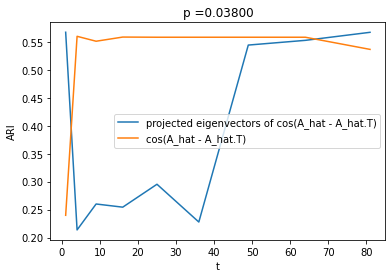

In [4]:
ARIs = pd.DataFrame(ARI_list)
ARIs.plot(x="t",y=["projected eigenvectors of cos(A_hat - A_hat.T)","cos(A_hat - A_hat.T)"],ylabel="ARI",xlabel="t",title=f"p =%.5f" % p).legend(loc='best')

Repeating the experiment with a new block model. We now use the following F:
$$F = \begin{pmatrix} 0.5 & 0.9 & 0.9 & 0.9 \\
                  0.1 & 0.5 & 1 & 0.5 \\ 
                  0.1 & 0 & 0.5 & 0.1 \\ 
                  0.1 & 0.5 & 0.9 & 0.5 \\ \end{pmatrix}$$

In [ ]:
n = 400
p = 0.5
q = 0.5
k = 4
i_vals = 10

def gen_F(i):
 return np.array([[0.5,1-i,1-i,1-i],
                  [0+i,0.5,1,0.5],
                  [0+i,0,0.5,0+i],
                  [0+i,0.5,1-i,0.5]])

ARI_list = {"probability of edge": [],"projected eigenvectors of A": [], "projected eigenvectors of Laplacian": [], "projected eigenvectors of cos(A_hat - A_hat.T)": [], "cos(A_hat - A_hat.T)": []}
F = gen_F(0.1)


fig, axs = plt.subplots(4,i_vals, figsize=(100, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .5, wspace=.3)
axs = axs.ravel()


for i in range(i_vals):

    dbsm = DirectedStochasticBlockModel(k,n,p/(2*(i+1)),q/(2*(i+1)),F)
    A_hat = dbsm()
        
    ARI_list["probability of edge"].append(p/(2*(i+1)))

    clustering_standard_A, proj_evecs_standard_A = DSBM_Clustering_Zanetti(adjacency_matrix=A_hat,K=k,l=2)
    ARI_list["projected eigenvectors of A"].append(dbsm.calculate_ARI(clustering_standard_A))
    np.fill_diagonal(proj_evecs_standard_A,0)

    clustering_standard_L, proj_evecs_standard_L = DSBM_Clustering_Zanetti(adjacency_matrix=A_hat,K=k, method='laplacian',l=2)
    ARI_list["projected eigenvectors of Laplacian"].append(dbsm.calculate_ARI(clustering_standard_L))
    np.fill_diagonal(proj_evecs_standard_L,0)

    clustering_exp, proj_evecs_exp = Exponential_Clustering(adjacency_matrix=A_hat,K=k,l=3,t=3)
    ARI_list["projected eigenvectors of cos(A_hat - A_hat.T)"].append(dbsm.calculate_ARI(clustering_exp))
    np.fill_diagonal(proj_evecs_exp,0)

    clustering_exp_no_evecs, proj_evecs_exp_no_evecs = Exponential_Clustering_no_evecs(adjacency_matrix=A_hat,K=k,t=3)
    ARI_list["cos(A_hat - A_hat.T)"].append(dbsm.calculate_ARI(clustering_exp_no_evecs))
    np.fill_diagonal(proj_evecs_exp_no_evecs,0)
    
    sns.heatmap(proj_evecs_standard_A,cmap="YlGnBu",ax=axs[i])
    axs[i].set_title("p = " + str(p/(2*(i+1))))
    sns.heatmap(proj_evecs_standard_L,cmap="PuBuGn",ax=axs[int(i_vals) + i])
    sns.heatmap(proj_evecs_exp,cmap="YlGnBu",ax=axs[2*int(i_vals) + i])
    sns.heatmap(proj_evecs_exp_no_evecs,cmap="YlGnBu",ax=axs[3*int(i_vals) + i])

    if i == 0:
        axs[i].set_ylabel("projected eigenvectors of A")
        axs[int(i_vals) + i].set_ylabel("projected eigenvectors of Laplacian")
        axs[2*int(i_vals) + i].set_ylabel("projected eigenvectors of cos(A_hat - A_hat.T)")
        axs[3*int(i_vals) + i].set_ylabel("cos(A_hat - A_hat.T)")
    print("iteration complete for p = q = " + str(p/(2*(i+1))))
    

In [ ]:
ARIs = pd.DataFrame(ARI_list)
ARIs.set_index("probability of edge",inplace=True)
ARIs.plot(ylabel="ARI",xlabel="p").invert_xaxis()
ARIs.to_csv("4block-1dominant.csv")

Now again, trying different values of t for p close to threshold

In [ ]:
n = 400
p = np.log(n-1)/n
q = p
k = 4
l = 4
t_vals = 10


def gen_F(i):
 return np.array([[0.5,1-i,1-i,1-i],
                  [0+i,0.5,1,0.5],
                  [0+i,0,0.5,0+i],
                  [0+i,0.5,1-i,0.5]])


ARI_list = {"t": [], "probability of edge": [], "projected eigenvectors of cos(A_hat - A_hat.T)": [], "cos(A_hat - A_hat.T)": []}
F = gen_F(0.1)

dbsm = DirectedStochasticBlockModel(k,n,p,q,F)
A_hat = dbsm()

for t in range(1,t_vals):
    

    ARI_list["t"].append(t**2)
    ARI_list["probability of edge"].append(p)

    clustering_exp, proj_evecs_exp = Exponential_Clustering(adjacency_matrix=A_hat,K=k,l=l,t=t**2)
    ARI_list["projected eigenvectors of cos(A_hat - A_hat.T)"].append(dbsm.calculate_ARI(clustering_exp))

    clustering_exp_no_evecs, proj_evecs_exp_no_evecs = Exponential_Clustering_no_evecs(adjacency_matrix=A_hat,K=k,t=t**2)
    ARI_list["cos(A_hat - A_hat.T)"].append(dbsm.calculate_ARI(clustering_exp_no_evecs))

    print("t = " + str(t) + " l = " + str(l))

In [ ]:
ARIs = pd.DataFrame(ARI_list)
ARIs.plot(x="t",y=["projected eigenvectors of cos(A_hat - A_hat.T)","cos(A_hat - A_hat.T)"],ylabel="ARI",xlabel="t",title=f"p =%.5f" % p).legend(loc='best')

In [ ]:
ARIs